In [40]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [51]:
df = pd.read_csv('Iris_Data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [43]:
x = df.drop('species', axis=1)
y = df['species'] 
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [44]:
sc = StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)


In [50]:
print(testX_scaled)

[[ 0.80611964 -0.14152374  1.19093175  1.34688404]
 [ 1.64312891  1.23546397  1.36201532  1.74465127]
 [ 1.04526515  0.54697012  1.13390389  1.21429496]
 [-0.8678989   0.54697012 -1.14721039 -0.90713027]
 [ 0.80611964 -0.14152374  0.84876461  1.08170588]
 [-0.38960789 -1.05951554  0.39254175  0.02099327]
 [ 0.44740138 -0.60051964  0.62065318  0.81652773]
 [ 0.32782863 -1.05951554  1.07687603  0.28617142]
 [-0.15046238 -0.60051964  0.44956961  0.15358235]
 [-0.15046238 -1.05951554 -0.12070896 -0.24418488]
 [ 2.12141992 -0.14152374  1.6471546   1.21429496]
 [ 0.44740138 -0.37102169  0.33551389  0.15358235]
 [-0.38960789  1.00596602 -1.37532182 -1.3048975 ]
 [ 0.20825588 -0.14152374  0.62065318  0.81652773]
 [ 1.88227441 -0.60051964  1.36201532  0.94911681]
 [-0.38960789  2.61245168 -1.31829396 -1.3048975 ]
 [ 0.20825588 -1.97750735  0.73470889  0.4187605 ]
 [-0.03088963 -0.83001759  0.22145818 -0.24418488]
 [ 1.1648379  -0.14152374  1.01984818  1.21429496]
 [-0.50918064  1.46496193 -1.26

In [29]:
mlp_clf =  MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [30]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.77


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


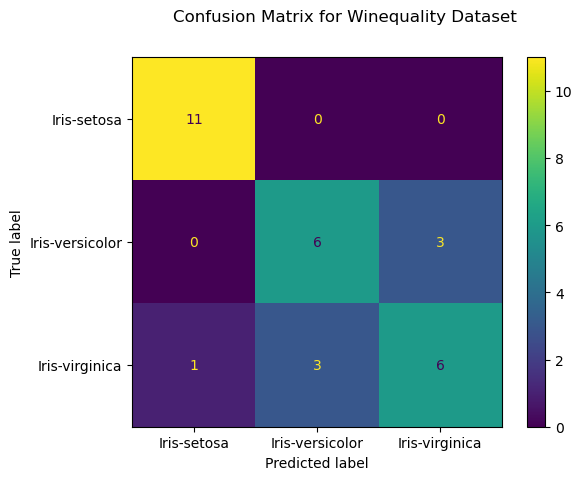

In [33]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()


In [54]:
print(classification_report(testY, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       0.33      0.44      0.38         9
Iris-versicolor       0.22      0.29      0.25         7
 Iris-virginica       0.56      0.36      0.43        14

       accuracy                           0.37        30
      macro avg       0.37      0.36      0.36        30
   weighted avg       0.41      0.37      0.38        30



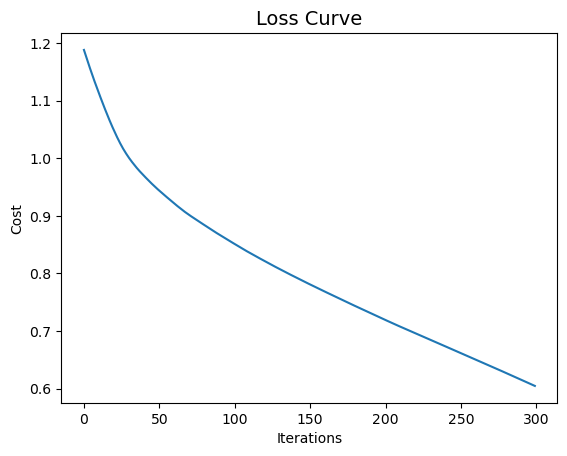

In [35]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [36]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


In [37]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))


Accuracy: 0.93
